# Eploring data analysis using the historical weather data

In [ ]:
'''

* the weater data was acquired from 538's open data github repo:
  https://github.com/fivethirtyeight/data/tree/master/us-weather-history

* Brief description of columns
- actual min/mean/max temp : The measured min/mean/max temperature for that day.
- average min/max temp : The average min/max temperature on that day since 1880.
- record min/max temp : The lowest/highest ever temperature on that day since 1880.
- record min/max temp year : The year that the lowest/highest ever temperature occurred.
- actual_precipitation : The measured amount of rain or snow for that day
- average_precipitation : The average amount of rain or snow on that day since 1880.
- record_precipitation : The highest amount of rain or snow on that day since 1880.

'''

In [36]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import matplotlib.gridspec as gridspec

## 1. Load the data

In [37]:
# create directory where you can download dataset from 
directory='https://raw.githubusercontent.com/fivethirtyeight/data/83bac8d3c0701a97acf24c34d67fd0175fec7552/us-weather-history'

# 10 different cities' data can be acquired from the directory. Cities are denoted as 
# US city ICAO airport codes as shown below.
station=['KCLT', 'KCQT', 'KHOU', 'KIND', 'KJAX', 'KMDW', 'KNYC', 'KPHL', 'KPHX', 'KSEA']

all_data=[]   # create list called all_data to store all 10 city weather data
for city in station:
    df=pd.read_csv(directory+"/"+city+".csv",index_col='date', parse_dates=True)
    all_data.append({'City':city,'data':df})

all_data  #show the data
#-> In Chicaco, data type of record_min_temp_year and record_max_temp_year needs to be changed

[{'City': 'KCLT',
  'data':             actual_mean_temp  actual_min_temp  actual_max_temp  \
  date                                                             
  2014-07-01                81               70               91   
  2014-07-02                85               74               95   
  2014-07-03                82               71               93   
  2014-07-04                75               64               86   
  2014-07-05                72               60               84   
  ...                      ...              ...              ...   
  2015-06-26                85               70              100   
  2015-06-27                82               71               92   
  2015-06-28                76               66               85   
  2015-06-29                73               59               87   
  2015-06-30                83               71               94   
  
              average_min_temp  average_max_temp  record_min_temp  \
  date            

In [38]:
print(len(all_data)) # check the length of all_data 

#-> 10 cities data

10


In [39]:
# let's change ICAO code into the name of city so that we can understand the data easier.

#create a list that conatains the name of city equivalent to ICAO code.
location=['Charlotte','Los Angeles','Houston','Indianapolis','Jacksonville','Chicago','New York','Philadelphia','Phoenix','Seattle']

for i in range(10):
    all_data[i]['City']=location[i]  #change the key value of City from ICAO code into name of city 
    print(all_data[i]['City'])

Charlotte
Los Angeles
Houston
Indianapolis
Jacksonville
Chicago
New York
Philadelphia
Phoenix
Seattle


In [40]:
# check if there's any missing values
for i in range(10):
    missing_value_count=all_data[i]['data'].isna().sum().sum()  
    print(all_data[i]['City'],': ',missing_value_count)
    
#-> There are two missing values in Chicago which is 5th all_data list

Charlotte :  0
Los Angeles :  0
Houston :  0
Indianapolis :  0
Jacksonville :  0
Chicago :  2
New York :  0
Philadelphia :  0
Phoenix :  0
Seattle :  0


In [41]:
# check missing values by column in Chicago=[5], 
all_data[5]['data'].isna().sum() 

#-> record_min_temp_year and record_max_temp_year have each one of missing value. 

actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     1
record_max_temp_year     1
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

In [42]:
# decide to just drop the two missing values in Chicago.
all_data[5]['data'].dropna(inplace=True)
print(all_data[5]['data'].isna().sum())

#->double check missing values afterward.

actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64


In [43]:
# check the total length of each city data.
for i in range(10):
    total_length=len(all_data[i]['data'])  
    print(all_data[i]['City'],': ',total_length)

#-> because of missing value imputation(remove) in Chicago, it has two samples less than others.

Charlotte :  365
Los Angeles :  365
Houston :  365
Indianapolis :  365
Jacksonville :  365
Chicago :  363
New York :  365
Philadelphia :  365
Phoenix :  365
Seattle :  365


In [44]:
# check descriptive statistics of dataset.
for i in range(10):
    print(all_data[i]['City'], end='\n')
    display(all_data[i]['data'].describe())

Charlotte


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,61.049315,49.958904,71.630137,48.819178,70.983562,31.465753,88.728767,1953.279452,1953.989041,0.102411,0.114082,2.208904
std,16.061789,16.575533,16.450481,13.832203,13.495207,18.430656,9.961209,39.170924,33.890497,0.301195,0.013650,0.879378
min,18.000000,7.000000,26.000000,29.000000,50.000000,-5.000000,69.000000,1879.000000,1879.000000,0.000000,0.090000,0.850000
25%,47.000000,37.000000,58.000000,36.000000,58.000000,15.000000,79.000000,1918.000000,1931.000000,0.000000,0.100000,1.650000
50%,63.000000,52.000000,73.000000,48.000000,72.000000,30.000000,90.000000,1963.000000,1953.000000,0.000000,0.110000,1.980000
75%,75.000000,65.000000,86.000000,63.000000,84.000000,49.000000,98.000000,1983.000000,1984.000000,0.030000,0.120000,2.540000
max,88.000000,75.000000,100.000000,68.000000,89.000000,62.000000,104.000000,2015.000000,2015.000000,2.650000,0.150000,6.880000


Los Angeles


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,68.561644,58.758904,77.810959,55.734247,75.221918,42.219178,95.641096,1898.210959,1958.038356,0.023342,0.040904,1.236959
std,6.856028,6.534100,8.312568,6.092966,6.053567,7.040399,6.609597,23.260632,40.598187,0.131883,0.043959,1.167216
min,48.000000,37.000000,56.000000,47.000000,67.000000,28.000000,80.000000,1878.000000,1879.000000,0.000000,0.000000,0.000000
25%,64.000000,54.000000,72.000000,50.000000,69.000000,36.000000,90.000000,1884.000000,1923.000000,0.000000,0.000000,0.210000
50%,68.000000,59.000000,78.000000,56.000000,74.000000,42.000000,96.000000,1893.000000,1971.000000,0.000000,0.020000,0.990000
75%,74.000000,64.000000,84.000000,62.000000,81.000000,48.000000,100.000000,1901.000000,1990.000000,0.000000,0.070000,1.970000
max,90.000000,76.000000,103.000000,64.000000,85.000000,55.000000,113.000000,2013.000000,2015.000000,1.600000,0.160000,5.880000


Houston


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,69.715068,60.115068,78.824658,60.084932,79.808219,40.446575,92.523288,1955.219178,1969.545205,0.176986,0.136356,3.016493
std,13.669406,14.024622,14.173452,11.694646,11.315235,17.372155,8.149876,38.149520,35.903966,0.505538,0.031842,1.491180
min,35.000000,28.000000,40.000000,43.000000,62.000000,5.000000,78.000000,1889.000000,1890.000000,0.000000,0.090000,0.750000
25%,60.000000,48.000000,70.000000,49.000000,69.000000,25.000000,85.000000,1912.000000,1947.000000,0.000000,0.110000,2.000000
50%,72.000000,64.000000,82.000000,60.000000,81.000000,40.000000,92.000000,1973.000000,1980.000000,0.000000,0.130000,2.700000
75%,82.000000,73.000000,90.000000,72.000000,91.000000,57.000000,100.000000,1985.000000,1999.000000,0.080000,0.160000,3.570000
max,89.000000,80.000000,99.000000,75.000000,95.000000,69.000000,109.000000,2014.000000,2013.000000,4.340000,0.220000,10.340000


Indianapolis


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,51.391781,42.241096,60.002740,43.928767,62.512329,20.191781,84.252055,1946.917808,1949.065753,0.105726,0.116274,1.999452
std,20.110749,19.796685,20.853163,16.016831,17.747093,23.406499,12.880560,38.233936,37.347728,0.262458,0.025210,0.829822
min,2.000000,-7.000000,9.000000,20.000000,35.000000,-27.000000,59.000000,1872.000000,1871.000000,0.000000,0.070000,0.650000
25%,35.000000,27.000000,42.000000,29.000000,45.000000,-2.000000,72.000000,1915.000000,1926.000000,0.000000,0.100000,1.480000
50%,54.000000,44.000000,64.000000,44.000000,65.000000,24.000000,86.000000,1958.000000,1949.000000,0.000000,0.110000,1.840000
75%,70.000000,60.000000,79.000000,60.000000,80.000000,41.000000,96.000000,1977.000000,1977.000000,0.070000,0.130000,2.360000
max,81.000000,73.000000,93.000000,66.000000,85.000000,54.000000,106.000000,2015.000000,2013.000000,1.910000,0.180000,7.200000


Jacksonville


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,68.978082,58.200000,79.260274,57.887671,79.391781,41.723288,91.736986,1966.775342,1965.093151,0.120301,0.143562,2.905973
std,12.237780,13.337792,12.053712,11.421061,9.543851,17.090343,6.747151,37.017874,33.330794,0.340607,0.067665,1.543767
min,34.000000,24.000000,40.000000,41.000000,64.000000,7.000000,80.000000,1874.000000,1872.000000,0.000000,0.060000,0.620000
25%,59.000000,48.000000,70.000000,47.000000,70.000000,26.000000,85.000000,1954.000000,1951.000000,0.000000,0.090000,1.810000
50%,71.000000,62.000000,81.000000,57.000000,80.000000,40.000000,92.000000,1977.000000,1967.000000,0.000000,0.120000,2.500000
75%,80.000000,70.000000,89.000000,70.000000,89.000000,60.000000,98.000000,1993.000000,1990.000000,0.010000,0.210000,3.610000
max,87.000000,78.000000,99.000000,73.000000,92.000000,69.000000,104.000000,2015.000000,2015.000000,3.050000,0.290000,9.820000


Chicago


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,51.068871,42.887052,58.746556,43.617080,59.556474,21.297521,83.231405,1959.581267,1968.865014,0.098953,0.107163,1.673829
std,20.406861,19.794132,21.478544,17.308524,18.811774,23.150115,15.625500,22.876340,25.908167,0.324729,0.025358,0.920567
min,1.000000,-7.000000,7.000000,18.000000,31.000000,-25.000000,51.000000,1873.000000,1928.000000,0.000000,0.050000,0.340000
25%,34.500000,29.500000,39.000000,27.000000,41.000000,-1.000000,69.000000,1940.000000,1947.000000,0.000000,0.090000,1.075000
50%,53.000000,44.000000,62.000000,44.000000,62.000000,26.000000,87.000000,1958.000000,1970.000000,0.000000,0.110000,1.410000
75%,70.000000,60.000000,79.000000,60.500000,78.000000,44.000000,97.000000,1979.000000,1990.000000,0.040000,0.130000,2.050000
max,83.000000,74.000000,94.000000,68.000000,85.000000,58.000000,109.000000,2015.000000,2014.000000,3.310000,0.150000,6.160000


New York


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,54.736986,47.246575,61.734247,48.016438,62.079452,28.243836,83.731507,1924.079452,1958.923288,0.126164,0.136822,2.386137
std,18.679979,18.277156,19.446971,14.749176,16.068765,20.729107,13.351306,38.000820,34.824357,0.325577,0.015734,1.045702
min,11.000000,2.000000,19.000000,27.000000,38.000000,-15.000000,54.000000,1871.000000,1876.000000,0.000000,0.100000,0.860000
25%,39.000000,34.000000,44.000000,34.000000,47.000000,8.000000,71.000000,1888.000000,1933.000000,0.000000,0.130000,1.690000
50%,58.000000,50.000000,65.000000,48.000000,63.000000,31.000000,87.000000,1920.000000,1962.000000,0.000000,0.140000,2.160000
75%,72.000000,64.000000,80.000000,63.000000,78.000000,47.000000,96.000000,1954.000000,1990.000000,0.050000,0.150000,2.750000
max,85.000000,77.000000,92.000000,69.000000,84.000000,59.000000,106.000000,2015.000000,2013.000000,2.540000,0.170000,8.280000


Philadelphia


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000
mean,55.884932,47.265753,63.983562,47.221918,64.723288,28.030137,84.989041,1947.30137,1957.835616,0.124548,0.113781,2.135452
std,18.947380,18.391740,19.886070,15.454917,16.432768,19.379854,12.556242,35.21000,35.722070,0.304216,0.015280,0.931560
min,10.000000,2.000000,17.000000,25.000000,40.000000,-11.000000,61.000000,1872.00000,1874.000000,0.000000,0.080000,0.850000
25%,39.000000,33.000000,46.000000,32.000000,49.000000,9.000000,73.000000,1930.00000,1931.000000,0.000000,0.100000,1.550000
50%,59.000000,50.000000,69.000000,46.000000,66.000000,29.000000,88.000000,1960.00000,1957.000000,0.000000,0.110000,1.880000
75%,73.000000,64.000000,82.000000,63.000000,81.000000,46.000000,97.000000,1969.00000,1990.000000,0.050000,0.120000,2.490000
max,86.000000,77.000000,96.000000,70.000000,87.000000,59.000000,106.000000,2014.00000,2014.000000,2.010000,0.150000,8.020000


Phoenix


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,77.320548,65.761644,88.389041,63.501370,86.717808,43.016438,100.010959,1934.356164,1976.279452,0.027726,0.022000,0.770466
std,14.055375,14.095072,14.506228,14.070588,14.704034,14.946783,12.650626,24.477041,29.460417,0.205119,0.012649,0.537395
min,41.000000,31.000000,46.000000,44.000000,65.000000,16.000000,77.000000,1895.000000,1896.000000,0.000000,0.000000,0.010000
25%,66.000000,54.000000,77.000000,50.000000,72.000000,30.000000,88.000000,1913.000000,1956.000000,0.000000,0.010000,0.360000
50%,77.000000,65.000000,89.000000,62.000000,87.000000,40.000000,102.000000,1929.000000,1985.000000,0.000000,0.020000,0.710000
75%,90.000000,79.000000,101.000000,78.000000,102.000000,56.000000,112.000000,1961.000000,2000.000000,0.000000,0.030000,1.050000
max,105.000000,94.000000,116.000000,84.000000,107.000000,70.000000,122.000000,1990.000000,2015.000000,3.290000,0.050000,3.290000


Seattle


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,56.542466,48.369863,64.189041,45.046575,60.317808,31.293151,76.131507,1962.709589,1983.230137,0.102548,0.102712,1.107178
std,10.437226,8.707561,12.867879,7.313657,10.737519,12.273400,13.671950,16.624424,18.870777,0.241871,0.062362,0.648280
min,30.000000,23.000000,37.000000,35.000000,45.000000,0.000000,54.000000,1948.000000,1945.000000,0.000000,0.010000,0.110000
25%,49.000000,43.000000,54.000000,37.000000,50.000000,22.000000,63.000000,1951.000000,1967.000000,0.000000,0.050000,0.660000
50%,56.000000,49.000000,62.000000,44.000000,59.000000,33.000000,76.000000,1955.000000,1985.000000,0.000000,0.090000,0.960000
75%,65.000000,55.000000,75.000000,52.000000,70.000000,42.000000,89.000000,1970.000000,1999.000000,0.060000,0.160000,1.410000
max,80.000000,65.000000,96.000000,57.000000,77.000000,50.000000,103.000000,2011.000000,2015.000000,2.200000,0.240000,5.020000


In [45]:
# check the datatype of each column
for i in range(10):
    print(all_data[i]['City'], end='\n')
    display(all_data[i]['data'].info())
    
#-> In Chicaco, data type of record_min_temp_year and record_max_temp_year needs to be changed

Charlotte
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Los Angeles
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Houston
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Indianapolis
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Jacksonville
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Chicago
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         363 non-null int64
actual_min_temp          363 non-null int64
actual_max_temp          363 non-null int64
average_min_temp         363 non-null int64
average_max_temp         363 non-null int64
record_min_temp          363 non-null int64
record_max_temp          363 non-null int64
record_min_temp_year     363 non-null float64
record_max_temp_year     363 non-null float64
actual_precipitation     363 non-null float64
average_precipitation    363 non-null float64
record_precipitation     363 non-null float64
dtypes: float64(5), int64(7)
memory usage: 36.9 KB


None

New York
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Philadelphia
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Phoenix
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

Seattle
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2014-07-01 to 2015-06-30
Data columns (total 12 columns):
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitation    365 non-null float64
record_precipitation     365 non-null float64
dtypes: float64(3), int64(9)
memory usage: 37.1 KB


None

In [46]:
# Check the start and end date of each data
for i in range(10):
    print(all_data[i]['City'], end='\n')
    print(all_data[i]['data'].index.min())
    print(all_data[i]['data'].index.max())
    
# -> they're all same

Charlotte
2014-07-01 00:00:00
2015-06-30 00:00:00
Los Angeles
2014-07-01 00:00:00
2015-06-30 00:00:00
Houston
2014-07-01 00:00:00
2015-06-30 00:00:00
Indianapolis
2014-07-01 00:00:00
2015-06-30 00:00:00
Jacksonville
2014-07-01 00:00:00
2015-06-30 00:00:00
Chicago
2014-07-01 00:00:00
2015-06-30 00:00:00
New York
2014-07-01 00:00:00
2015-06-30 00:00:00
Philadelphia
2014-07-01 00:00:00
2015-06-30 00:00:00
Phoenix
2014-07-01 00:00:00
2015-06-30 00:00:00
Seattle
2014-07-01 00:00:00
2015-06-30 00:00:00


In [47]:
# In Chicaco, data type of record_min_temp_year and record_max_temp_year needs to be changed (it's denoted like 1982.0).
# Change digit of year in record_min_temp_year and record_max_temp_year in Chicago. 
all_data[5]['data']['record_min_temp_year']=all_data[5]['data']['record_min_temp_year'].astype(int)
all_data[5]['data']['record_max_temp_year']=all_data[5]['data']['record_max_temp_year'].astype(int)

all_data[5]['data']['record_min_temp_year']
#all_data[5]['data']['record_max_temp_year']
#-> now it looks good.

date
2014-07-01    1982
2014-07-02    1930
2014-07-03    1940
2014-07-04    1940
2014-07-05    1972
              ... 
2015-06-26    1945
2015-06-27    1981
2015-06-28    1938
2015-06-29    1943
2015-06-30    1943
Name: record_min_temp_year, Length: 363, dtype: int32

## 2. Data Visualization

### 2-1. The total amount of precipitation for a year.
Q. which city has the highest/lowest amount of precipitation in average?
<br>
Q. which city has the highest/lowest amount of precipitation in 2014-2015?
<br>
Q. Any city that has a odd precipitation in 2014-2015 compared to the average?

,city_name,sum_actual_precipitation,sum_average_precipitation
0,Charlotte,37.38,41.64
1,Los Angeles,8.52,14.93
2,Houston,64.60,49.77
3,Indianapolis,38.59,42.44
4,Jacksonville,43.91,52.40
5,Chicago,35.92,38.90
6,New York,46.05,49.94
7,Philadelphia,45.46,41.53
8,Phoenix,10.12,8.03
9,Seattle,37.43,37.49


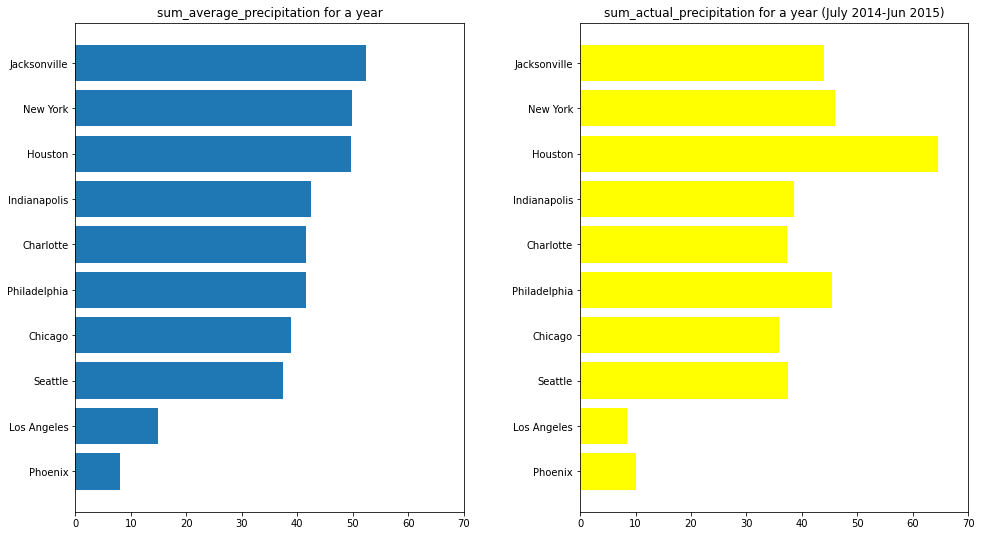

In [48]:
## Prepare the dataset to plot ##

# cretae dataframe storing sum of precipitation for all the cities.
precipitation=pd.DataFrame()

# create lists to append each city data
city_name=[]
sum_actual_precipitation=[]
sum_average_precipitation=[]


for i in range(10):       #check each city
    city_name.append(all_data[i]['City'])  #append city name
    
    #append the total amount of acutal_precipitation
    sum_actual_precipitation.append(sum(all_data[i]['data']['actual_precipitation'])) 
    #append the total amount of average_precipitation
    sum_average_precipitation.append(sum(all_data[i]['data']['average_precipitation']))

#add each list into the precipitation dataframe as column
precipitation['city_name']=city_name
precipitation['sum_actual_precipitation']=sum_actual_precipitation
precipitation['sum_average_precipitation']=sum_average_precipitation

# show the final dataframe
display(precipitation)


## Create barplot ##

fig=plt.figure(figsize=(16,9)) 
ax1=fig.add_subplot(121)  
ax2=fig.add_subplot(122)

# store data in order of sum_average_precipitation.
df_sorted=precipitation.sort_values('sum_average_precipitation', ascending=True)

# barplot1 using sum_average_precipitation data
ax1.barh('city_name', 'sum_average_precipitation', data=df_sorted)
ax1.set_title('sum_average_precipitation for a year')
ax1.set_xlim(0, 70, 10)

# barplot2 using sum_actual_precipitation
ax2.barh('city_name', 'sum_actual_precipitation', data=df_sorted, color='yellow')
ax2.set_title('sum_actual_precipitation for a year (July 2014-Jun 2015)')
ax2.set_xlim(0, 70, 10)

plt.rcParams.update({'font.size': 14}) 
fig.subplots_adjust(wspace=.3)

In [ ]:
'''
plots right above show the total amount of percipitation for a year.
1.Based on the graph on the left hand side, In average, Jacksonville has the highest
  amount of precipitation. On the other hand, Phonix has the least amount of precipitation.
  LA and Phoenix should be the driest city amoung the list. People there might consume more
  products taking care of dry skin.
  
2.Based on the graph on the right hand sie (July 2014-Jun 2015), 
  Houston has the highest actual amount of precipitation which is even higher than its average 
  amount.

3.Jacksonville and Los Angeles have less precipitation in 2014-2015 compared to the 
  average amount.
  
'''

### 2-2. Temperature fluctuation(within a day) across the year
* temperature fluctutaion(range_temp)=max_temp - min_temp.
<br>
Q. Which city has the biggest/least fluctuaion of temperature in average?
<br>
Q. Does the temperature fluctuation chage with season? 
<br>
Q. Difference of temperature fluctuation between cities chage with season? 
<br>


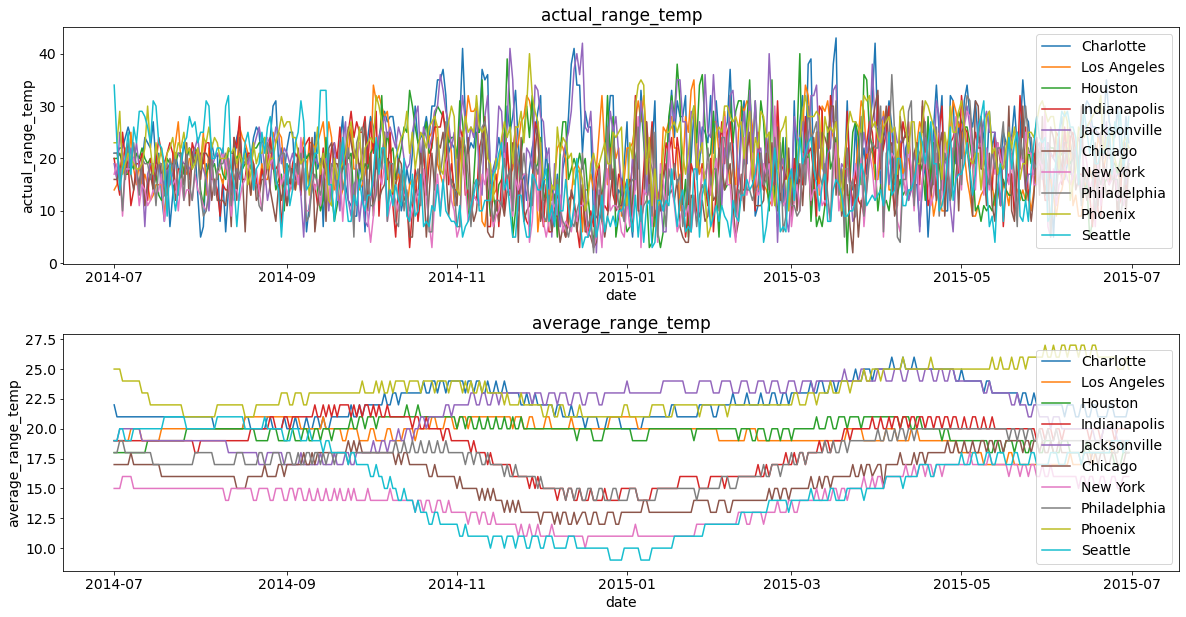

In [49]:
## Prepare the data to plot##

for i in range(10): # store data, max-min of each actual and averate temperature.
    all_data[i]['data']['actual_range_temp']=all_data[i]['data']['actual_max_temp']-all_data[i]['data']['actual_min_temp']
    all_data[i]['data']['average_range_temp']=all_data[i]['data']['average_max_temp']-all_data[i]['data']['average_min_temp']

    
## Plot ##
fig, axs=plt.subplots(2,1, figsize=(20,10))
fig.subplots_adjust(wspace=.3)

location=['Charlotte','Los Angeles','Houston','Indianapolis','Jacksonville','Chicago','New York','Philadelphia','Phoenix','Seattle']
y=['actual_range_temp','average_range_temp'] 
axs=axs.ravel()

for i in range(2):
    for j in range(10):
        axs[i].plot(all_data[j]['data'][y[i]], label=location[j])
        axs[i].legend()
        axs[i].set_title(y[i])
        axs[i].set_xlabel('date')
        axs[i].set_ylabel(y[i])

fig.subplots_adjust(hspace=.3)
plt.rcParams.update({'font.size': 14})     

In [ ]:
'''
plots right above show the trend of temperature difference between max and min temp.
y-axis indicates the difference between max_temp-min_temp.

1. First graph shows the trend of fluctuation using actual_temp. Since the trend itself 
  highlyy fluctuates, it's hard to discern.

2. Second graph shows the trend of fluctuation using average_temp. Since they're averaged data
  it shows more smoothed data which let us interpret better. 
  
  2.1. Overall, based on the y-axis values, Phonix has the biggest fluctuation of temperature
       within a day. On the other hand, New York has the least fluctuation of temperature.
  2.2. the temperature fluctuation shows the seasonal change. cities in Seattle, New York, Chicaco,
       Philadelphia and Indianapolis show that daily temperature fluctuation decreases in winter.
    
       However, Jacksonville shows that the daily temperature fluctuation decreases in summer.
  2.3 Overall, it shows narrower distribution of the dataset across the cities in summer.

'''

### 2-3. Distribution of the range of min-max actual temp in Agust and January.

August data
{'Charlotte': [5, 7, 19, 18, 23, 20, 21, 8, 16, 6, 14, 17, 19, 24, 26, 18, 22, 19, 20, 24, 26, 25, 18, 15, 23, 24, 30, 31, 19, 22, 17], 'Los Angeles': [19, 25, 13, 22, 19, 14, 17, 17, 15, 19, 20, 18, 16, 18, 26, 24, 23, 21, 13, 17, 15, 15, 19, 16, 16, 19, 25, 23, 25, 24, 18], 'Houston': [14, 11, 17, 19, 18, 19, 16, 20, 17, 16, 22, 21, 21, 20, 21, 18, 19, 20, 18, 22, 22, 23, 23, 24, 21, 23, 19, 14, 16, 17, 10], 'Indianapolis': [21, 19, 23, 23, 16, 16, 14, 9, 15, 14, 14, 13, 24, 22, 28, 16, 16, 21, 21, 19, 16, 13, 18, 16, 19, 24, 18, 18, 19, 7, 14], 'Jacksonville': [19, 18, 16, 10, 18, 20, 21, 20, 22, 18, 20, 14, 12, 18, 16, 20, 20, 19, 21, 22, 24, 26, 23, 18, 12, 15, 22, 26, 25, 19, 22], 'Chicago': [16, 21, 21, 20, 12, 16, 12, 12, 12, 11, 16, 7, 24, 12, 24, 17, 6, 18, 13, 19, 12, 13, 16, 16, 19, 14, 11, 8, 15, 12, 16], 'New York': [13, 11, 10, 14, 19, 13, 17, 18, 21, 20, 16, 9, 14, 14, 12, 15, 16, 18, 20, 14, 18, 14, 10, 16, 24, 19, 20, 16, 19, 15, 17], 'Philadelphia': [13, 

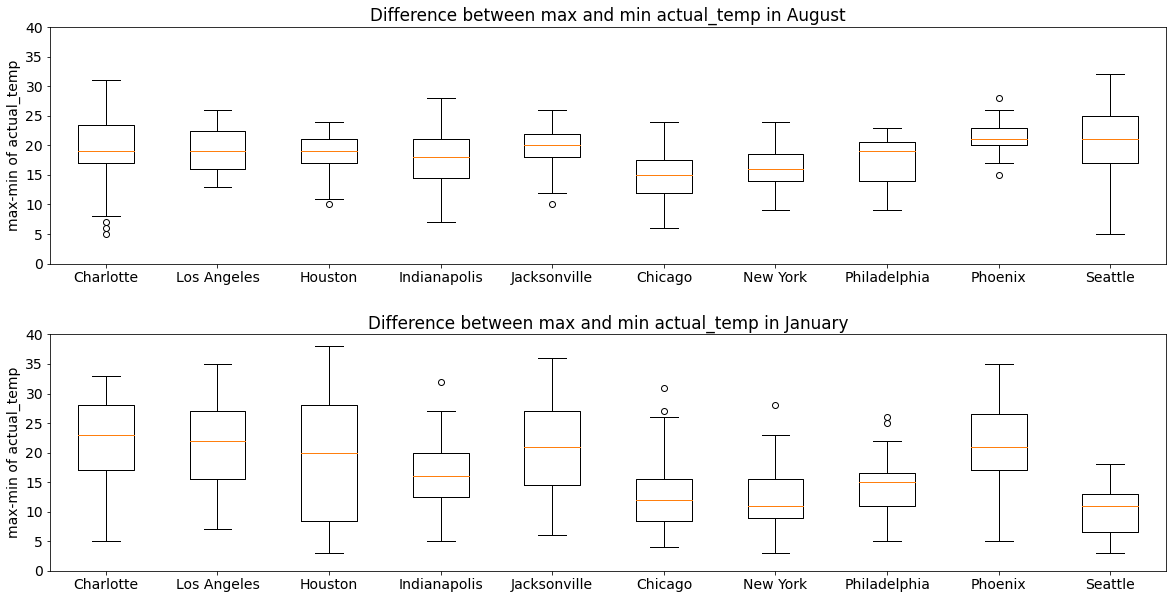

In [50]:
### We have a hint that temperature difference is affected by weather. so let's see in detail
### in Agust and Janary using actual dataset.

## Prepare the data ##
obj_Aug={}  # create dictionary to story August data only
obj_Jan={}  # create dictionary to story January data only

#Storing August data
for i in range(10): #generating actual range of temperature (actual_max-actual_min)
    all_data[i]['data']['actual_range_temp']=all_data[i]['data']['actual_max_temp']-all_data[i]['data']['actual_min_temp']
    obj2=pd.DataFrame(all_data[i]['data']['actual_range_temp'].resample(rule='M')) #storing data per month
    obj2.columns=['date','values']    #set the column names
    obj_Aug[all_data[i]['City']]=list(obj2.values[:,1][1])  # Store August=[1] data for each city
print('August data',end='\n')
print(obj_Aug)
print('\n')

#Storing January data
for i in range(10): #generating actual range temperature (actual_max-actual_min)
    all_data[i]['data']['actual_range_temp']=all_data[i]['data']['actual_max_temp']-all_data[i]['data']['actual_min_temp']
    obj2=pd.DataFrame(all_data[i]['data']['actual_range_temp'].resample(rule='M')) #storing data per month
    obj2.columns=['date','values']    #set the column names
    obj_Jan[all_data[i]['City']]=list(obj2.values[:,1][6])  # Store January[6] data for each city
print('January data',end='\n')
print(obj_Jan)
print('\n')


## Create boxplot ##
fig, axs=plt.subplots(2,1, figsize=(20,10))
fig.subplots_adjust(wspace=.3)

month=[obj_Aug, obj_Jan]
Month=['August', 'January']

axs=axs.ravel()
for i in range(2):
    
    axs[i].boxplot(month[i].values())
    axs[i].set_xticklabels(month[i].keys())
    axs[i].set_title('Difference between max and min actual_temp in ' +Month[i])
    axs[i].set_ylabel('max-min of actual_temp')
    axs[i].set_ylim(0, 40, 10)

fig.subplots_adjust(hspace=.3)
plt.rcParams.update({'font.size': 14})     


In [ ]:
'''
Please keep in mind that y axis indicates the range of actual_temp which means max_actual_temp minus min_actual_temp. 
Therefore, absolute value itself indicates how big the range of actual_temp per day. 
Box plots were constructed using 30-31 day of each range datapoint in August(upper) and January(lower). 

1. Overall, January shows the bigger distribtuion of range_actual_data than August.
2. Cities in Los Angeles, Houston, Jacksonville, and Phoenix show bigger distribution in Janary.
   However, Seattle shows smaller distribution in January.

'''

### 2-4-1. Explore record_min/max_temp 
<br>
Q. Which city has the lowest record_min_temp in winter?
<br>
Q. Which city has the highest record_mxn_temp in summer?


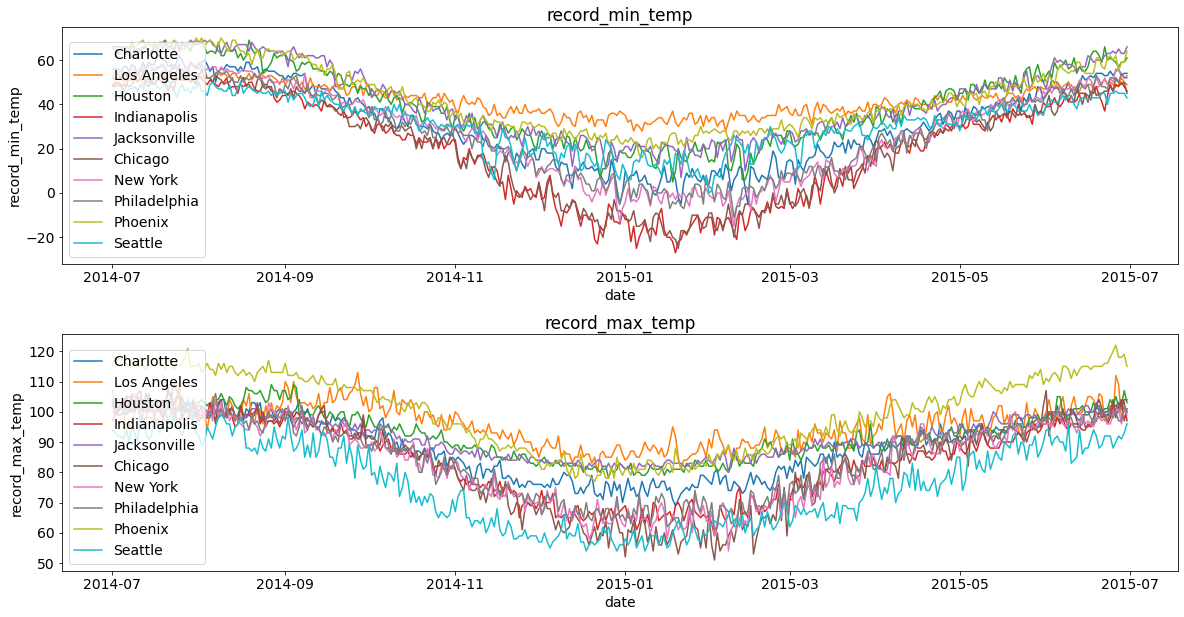

In [51]:
## plot of record_min_temp (above) and record_max_temp(below)

fig, axs=plt.subplots(2,1, figsize=(20,10))
fig.subplots_adjust(wspace=.3)

location=['Charlotte','Los Angeles','Houston','Indianapolis','Jacksonville','Chicago','New York','Philadelphia','Phoenix','Seattle']
y=['record_min_temp','record_max_temp']
axs=axs.ravel()
for i in range(2):
    for j in range(10):
        axs[i].plot(all_data[j]['data'][y[i]], label=location[j])
        axs[i].legend()
        axs[i].set_title(y[i])
        axs[i].set_xlabel('date')
        axs[i].set_ylabel(y[i])

fig.subplots_adjust(hspace=.3)
plt.rcParams.update({'font.size': 14})     

In [ ]:
'''
The plots above show the trend of record_min/max_temp for a given timestamp.
1. record_min_temp : Indianapolis and Chicago show the lowest record_min_temp in winter.
2. record_max_temp : Log Angeles and Phoneix show the highest record_max_temp in summer.

Let's find the years that have the most counts in that city in that month.
'''

### 2-4-2. Explore record_min/max temp_year.
<br>
Q. Which year has the most counts in record_min_temp_year in Indianapolis and Chicago (two cities are slected from above data)
<br>
Q. Which year has the most counts in record_max_temp_year in Los Angeles and Phoenix (two cities are slected from above data)


In [52]:
# Indianapolis [3]
print(all_data[3]['City']+ ' , top 5 year that have the most counts of record_min_temp_year', end='\n')
all_data[3]['data']['record_min_temp_year'].value_counts()  # count the value
obj3=pd.DataFrame(all_data[3]['data']['record_min_temp_year'].value_counts())
display(obj3.head(5)) # show only top 5 rank
print('\n')

# Chicago [5]
print(all_data[5]['City']+ ' , top 5 year that have the most counts of record_min_temp_year', end='\n')
all_data[5]['data']['record_min_temp_year'].value_counts()
obj3=pd.DataFrame(all_data[5]['data']['record_min_temp_year'].value_counts())
display(obj3.head(5))
print('\n')

# Los Angeles [1]
print(all_data[1]['City']+ ' , top 5 year that have the most counts of record_max_temp_year', end='\n')
all_data[1]['data']['record_max_temp_year'].value_counts()
obj3=pd.DataFrame(all_data[1]['data']['record_max_temp_year'].value_counts())
display(obj3.head(5))
print('\n')


# Phoneix [8]
print(all_data[8]['City']+ ' , top 5 year that have the most counts of record_max_temp_year', end='\n')
all_data[8]['data']['record_max_temp_year'].value_counts()
obj3=pd.DataFrame(all_data[8]['data']['record_max_temp_year'].value_counts())
display(obj3.head(5))
print('\n')


Indianapolis , top 5 year that have the most counts of record_min_temp_year


,record_min_temp_year
1976,13
1963,12
1974,9
1989,8
1885,7




Chicago , top 5 year that have the most counts of record_min_temp_year


,record_min_temp_year
1930,19
1936,17
1983,13
1940,12
1982,12




Los Angeles , top 5 year that have the most counts of record_max_temp_year


,record_max_temp_year
1971,14
1985,13
1995,11
1890,9
1979,8




Phoenix , top 5 year that have the most counts of record_max_temp_year


,record_max_temp_year
1989,23
1990,16
1950,16
2003,13
2007,10


### 2-5. General trend of avg_min/max_temp and actual_mean_temp

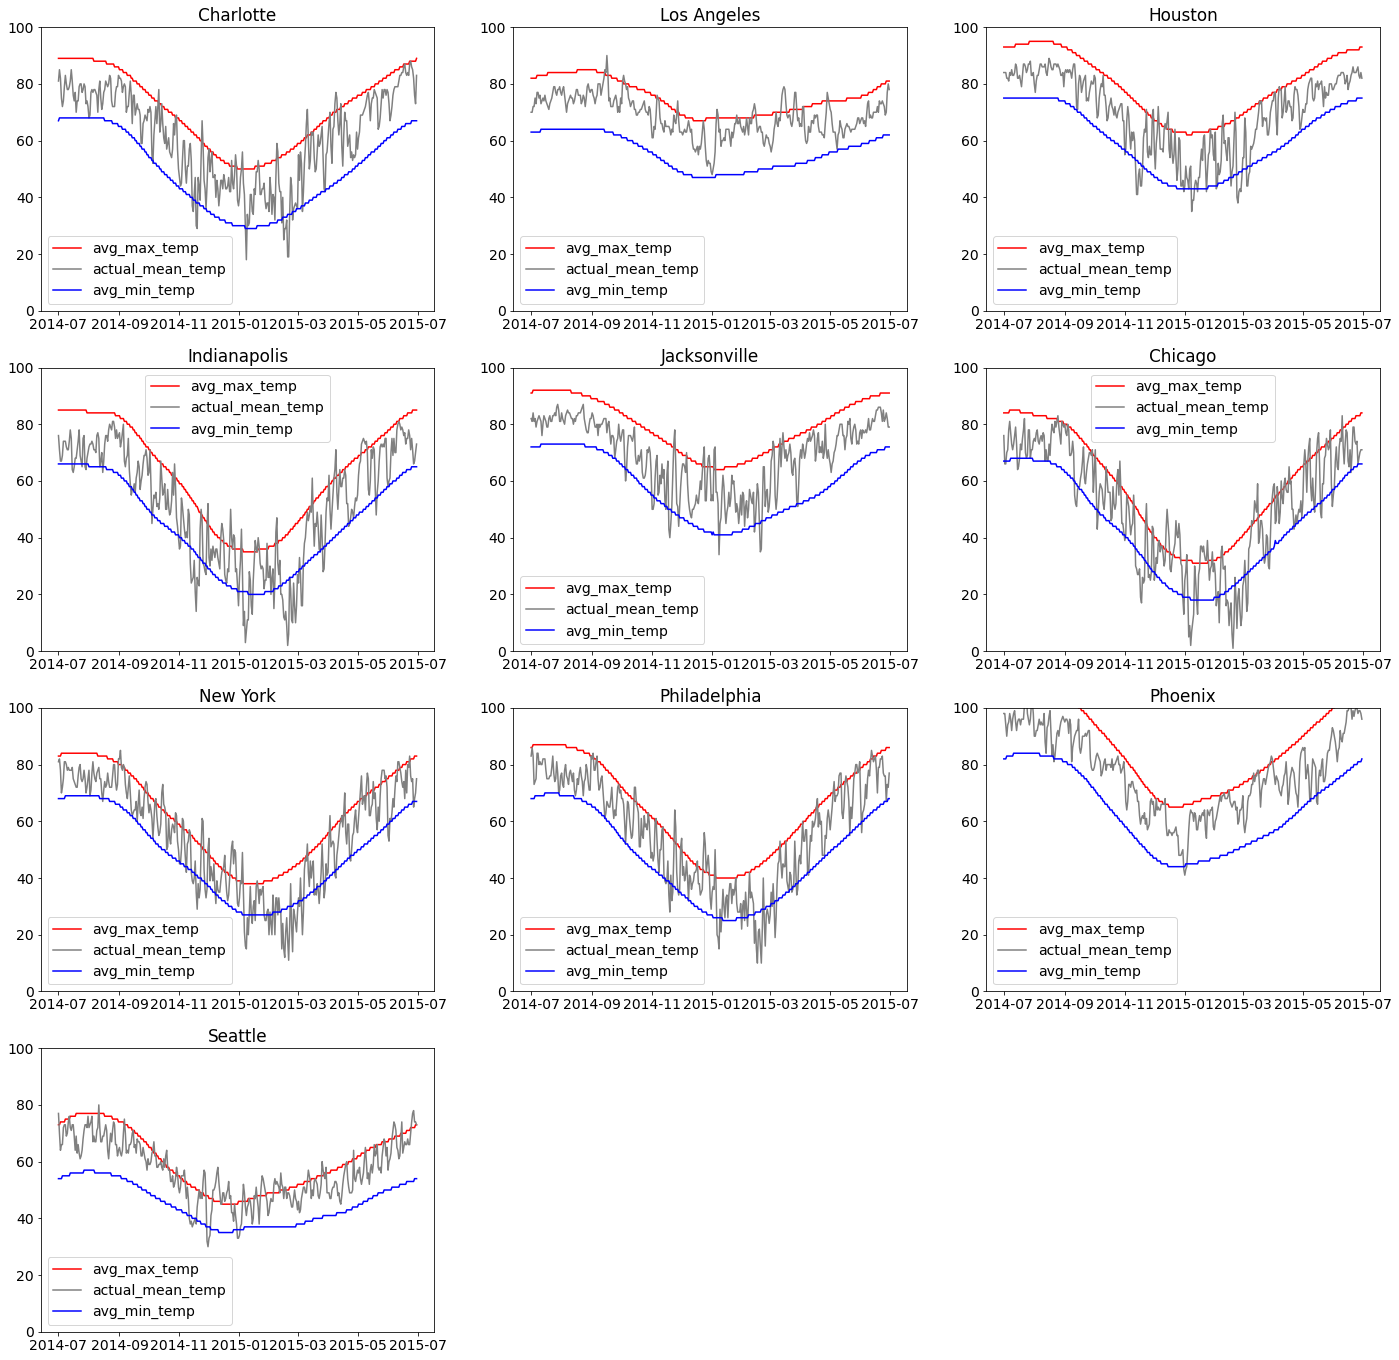

In [53]:
location=['Charlotte','Los Angeles','Houston','Indianapolis','Jacksonville','Chicago','New York','Philadelphia','Phoenix','Seattle']

plt.figure(figsize=(24,24))
gs=gridspec.GridSpec(4,3)
for i, col in enumerate(location):
    ax=plt.subplot(gs[i])
    plt.plot(all_data[i]['data']['average_max_temp'],color='red',label='avg_max_temp') # plot of avg_max_temp
    plt.plot(all_data[i]['data']['actual_mean_temp'],color='grey',label='actual_mean_temp') # plot of actual_mean_temp
    plt.plot(all_data[i]['data']['average_min_temp'],color='blue', label='avg_min_temp') # plot of avg_min_temp
    ax.set_title(col)
    ax.set_ylim(0,100,10)
    ax.legend()
    
plt.show()


In [ ]:
'''
The plots above show the general trend of avg_min/max_temp and actual_mean_temp.
1. cities in charlotte, Indianapolis, Chicago, New York, Philadelphia show very similar trend.
2. Los Angeles and Seattle show similar trend that the temperature difference summer and winter is relatively small.
   However, Los Angeles shows higher temperature than Seattle all year.
3. Temperature in Phoenix is the highest than any other cities all year.
4. New York shows very narrow range of temperature between avg_min_temp and avg_max_temp(width of two band is small).
   which can be found from 2-2 plot.

'''